# **Download libraries**


In [ ]:
!pip install -q sounddevice
!pip install -q -i https://test.pypi.org/simple/ mediapipe==0.9.3.2

In [ ]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyttsx3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install espeak

Reading package lists... Done
Building dependency tree       
Reading state information... Done
espeak is already the newest version (1.48.04+dfsg-8build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install playsound


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

!sudo add-apt-repository ppa:alex-p/tesseract-ocr


  The Tesseract OCR engine was one of the top 3 engines in the 1995
 UNLV Accuracy test. Between 1995 and 2006 it had little work done on
 it, but since then it has been improved extensively by Google and is
 probably one of the most accurate open source OCR engines
 available. It can read a wide variety of image formats and convert
 them to text in over 40 languages. This package includes the command
 line tool.
 More info: https://launchpad.net/~alex-p/+archive/ubuntu/tesseract-ocr
Press [ENTER] to continue or Ctrl-c to cancel adding it.


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.

In [ ]:
!sudo apt-get update


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/alex-p/tesseract-ocr/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done


In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.3-1ppa1~focal1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!sudo apt install libtesseract-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.1.3-1ppa1~focal1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!sudo pip install pytesseract


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Checking the installation.
!tesseract --version

tesseract 4.1.3
 leptonica-1.79.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 2.0.3) : libpng 1.6.37 : libtiff 4.1.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.1
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.4.0 zlib/1.2.11 liblzma/5.2.4 bz2lib/1.0.8 liblz4/1.9.2 libzstd/1.4.4


In [ ]:
pip install googletrans==4.0.0-rc1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-tasks/object_detector/efficientdet_lite2_uint8.tflite

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab.patches import cv2_imshow

# **Execute **

In [ ]:
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


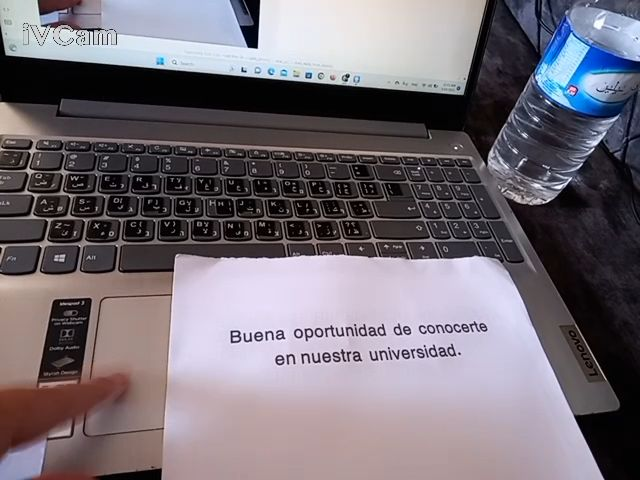

In [ ]:
from IPython.display import Image

try:
  IMAGE_FILE = take_photo()
  print('Saved to {}'.format(IMAGE_FILE))

  # Show the image which was just taken.
  display(Image(IMAGE_FILE))
  img = cv2.imread(IMAGE_FILE)

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
import numpy as np

# define camera parameters
focal_length = 500  # in pixels
sensor_width = 3.68  # in mm
sensor_height = 2.76  # in mm

# load image and convert to grayscale
img1 = cv2.imread(IMAGE_FILE)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# apply thresholding to extract the object of interest
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# find contours of the object
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# find the contour with the largest area
largest_contour = max(contours, key=cv2.contourArea)

# compute the size of the object in pixels
object_size = cv2.contourArea(largest_contour)

# compute the distance to the object
distance = (focal_length * sensor_width * 1000) / (object_size * sensor_height)*5

# print the distance
print("Distance to object: {:.2f} cm".format(distance))


Distance to object: 22.33 cm


# **Download image**

# **Running code and visualizing the results**

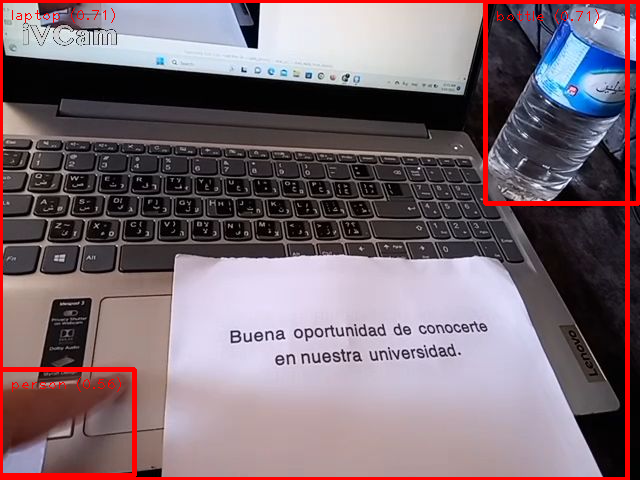

In [ ]:
# STEP 1: Import the necessary modules.
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='efficientdet.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(IMAGE_FILE)

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)

In [ ]:
from typing import Tuple
from typing import List

def visualize_and_split(
    image,
    detection_result
) -> Tuple[np.ndarray, List[np.ndarray]]:
    """Draws bounding boxes on the input image and returns it along with a list of cropped objects.
    Args:
        image: The input RGB image.
        detection_result: The list of all "Detection" entities to be visualized and split.
    Returns:
        Tuple containing the annotated image and a list of cropped objects.
    """
    cropped_objects = []
    for detection in detection_result.detections:
        # Draw bounding_box
        bbox = detection.bounding_box
        start_point = bbox.origin_x, bbox.origin_y
        end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
        cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

        # Crop object and append to list
        object_image = image[bbox.origin_y:bbox.origin_y+bbox.height, bbox.origin_x:bbox.origin_x+bbox.width]
        cropped_objects.append(object_image)

        # Draw label and score
        category = detection.categories[0]
        category_name = category.category_name
        probability = round(category.score, 2)
        result_text = category_name + ' (' + str(probability) + ')'
        text_location = (MARGIN + bbox.origin_x, MARGIN + ROW_SIZE + bbox.origin_y)
        cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                    FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

    return image, cropped_objects

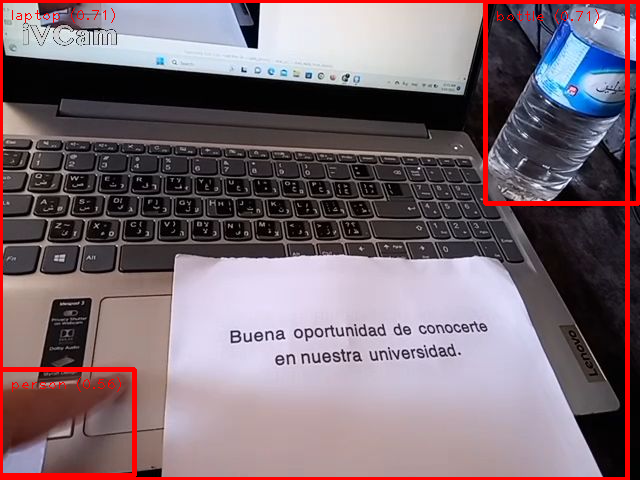

In [ ]:
image_copy = np.copy(image.numpy_view())
annotated_image, cropped_objects = visualize_and_split(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)

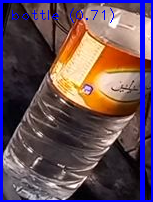

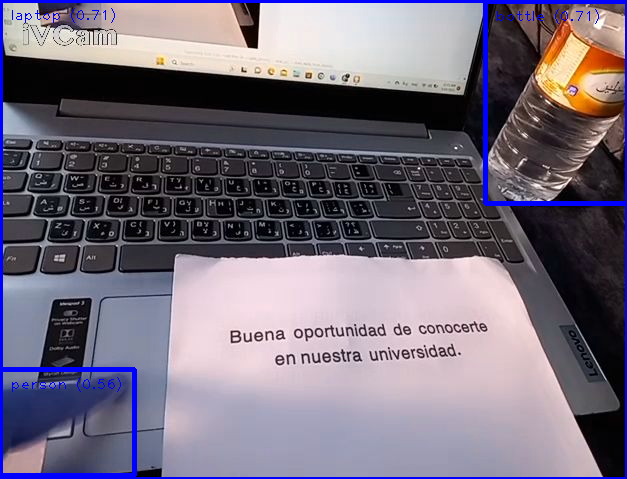

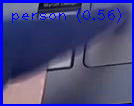

In [ ]:
# Import cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow
# Display cropped objects
for i, obj in enumerate(cropped_objects):
    cv2_imshow(obj)

In [ ]:
import cv2
import numpy as np
import pytesseract
from PIL import Image

# Path of working folder on Disk

def get_string(img_path):
    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite("removed_noise.png", img)

    #  Apply threshold to get image with only black and white
    #img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

    # Write the image after apply opencv to do some ...
    cv2.imwrite(img_path, img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(Image.open(img_path))

    # Remove template file
    #os.remove(temp)

    return result
if len(get_string(IMAGE_FILE)) >1:
  print ('--- Start recognize text from image ---')
  print (get_string(IMAGE_FILE))



--- Start recognize text from image ---
Buena oportunidad de conocerte
en nuestra universides.

 



In [ ]:
get_string(IMAGE_FILE).isalnum()

False

In [ ]:
from googletrans import Translator, constants
from pprint import pprint
# init the Google API translator
translator = Translator()
if len(get_string(IMAGE_FILE).strip()) >0 :
  translation = translator.translate(get_string(IMAGE_FILE))
  if translation.src != translation.dest:
    bol=True
    print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
    words=translation.text
  else:
    words=get_string(IMAGE_FILE)
else:
  words=get_string(IMAGE_FILE)
  pass



Buena oportunidad de conocerte
en nuestra universides.

 
 (es) --> Good opportunity to meet you
In our universides. (en)


In [ ]:
from gtts import gTTS
import os

# Assume `cropped_objects` contains the list of cropped objects returned by your `visualize_and_split` function
object_names = [detection.categories[0].category_name for detection in detection_result.detections]


if len(get_string(IMAGE_FILE).strip()) >0 and len(object_names)>0:
   print ('--- Start recognize text from image ---')
   print (get_string(IMAGE_FILE))
   # Concatenate the names of the objects into a single string
   text = "I can see " + ", and".join(object_names)+"and I can see at the text"+words+"Which is about a distance away from you"+"{:.2f}".format(distance)+"Centimeter"



elif len(get_string(IMAGE_FILE).strip()) ==0 and len(object_names)>0:
   print ('--- Start recognize text from image ---')
   print (get_string(IMAGE_FILE))
   # Concatenate the names of the objects into a single string
   text = "I can see " + ", and".join(object_names)+"Which is about a distance away from you"+"{:.2f}".format(distance*5)+"Centimeter"




elif len(get_string(IMAGE_FILE).strip()) >0 and len(object_names)==0:
   print ('--- Start recognize text from image ---')
   print (get_string(IMAGE_FILE))
   # Concatenate the names of the objects into a single string
   text ="I can see at the text"+words+"Which is about a distance away from you"+"{:.2f}".format(distance*5)+"Centimeter"



else:
  text='sorry I can not see anything'



# Use gTTS to generate an audio file from the text
tts = gTTS(text)
tts.save("objects.mp3")

# Play the audio file using the default system player
os.system("mpg321 objects.mp3")


--- Start recognize text from image ---
Buena oportunidad de conocerte
en nuestra universides.

 



32512

In [ ]:
from pydub import AudioSegment
from pydub.playback import play
sound = AudioSegment.from_file("objects.mp3", format="mp3")
play(sound)

In [ ]:
from IPython.display import Audio
Audio("objects.mp3")